In [265]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp

## Pregunta 1

Considere el PVI 
$$ t ^2 y' - ty +y^2 = 0 \quad ; \quad y(1)=1 $$

a) Utilice el método RK4 para obtener una aproximación de $y(10)$ considerando $h=0.01$.

## Solución:

Se despeja y' para aplicar poder el método de RK4, definiendo la funcion

In [266]:
def f(t,y): return (t*y-(y**2))/(t**2)

y' = (t * y - y^2) / t^2

Se definen los parametros de entrada de la función

In [267]:
x0 = 1
xn = 10
y0 = 1
h = 0.01
n = int((xn-x0)/h) # 900

In [268]:
def RK4(f, x0, xn, y0, n): # Se define el metodo RK4
    X = np.linspace(x0,xn,n+1)
    Y = np.linspace(x0,xn,n+1)                 
    Y[0] = y0        
    h = (xn-x0)/n     
    for i in range(n):
        K1=f(X[i],Y[i]) 
        K2=f(X[i]+h/2,Y[i]+(h/2)*K1) 
        K3=f(X[i]+h/2,Y[i]+(h/2)*K2) 
        K4=f(X[i]+h,Y[i]+h*K3)
        Y[i+1] = Y[i] +(h/6)*(K1+2*K2+2*K3+K4)
    coord = dict()
    coord['x'] = X
    coord['y'] = Y 
    return coord

La aproximación obtenida por el método RK4, es 3.0279310655977727, calculada la siguiente forma:  

In [269]:
solve = RK4(f, 1, 10, 1, 900) # Se reemplazan los parametros
X = solve['x']
Y = solve['y']
Y[-1] # Se obtiene la aproximación por RK[4] de y(10) accediendo al ultimo elemento

3.0279310655977727

b) La solución explícita al PVI está dado por

$$ y(t) = \frac{1}{1+\ln t}  $$

Calcule el error cometido al aproximar $y(10)$ y justifique si es una buena aproximación.


## Solución:

Solución explícita del PVI

In [270]:
def f(t): return t/(1+np.log(t))
t = 10
Error = np.abs(t/(1+np.log(t)) - Y[-1])
Error

4.3365755431068465e-11

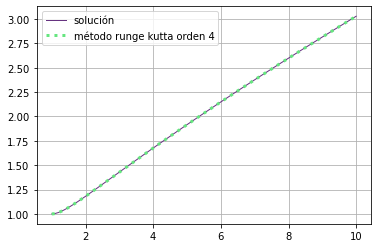

In [271]:
# Adicionalmente se puede observar el comportamiento de la solución y la aproximación por RK4
x = np.linspace(1,10,100)
plt.plot(x, f(x),linewidth=1, linestyle='-', color=(0.4, 0.2 ,0.5), label='solución')
plt.plot(X, Y,linewidth=3, linestyle=':', color=(0.4, 0.9 ,0.5), label='método runge kutta orden 4')
plt.grid()
plt.legend()

Como se puede observar el error es muy pequeño (4.3365755431068465e-11) y como se puede ver además en la grafica se acerca en gran medida al original.

## Pregunta 2

Considere la ecuación diferencial
$$  y''' - \alpha^2 y' =  g(t) $$
donde $g$ es la función continua por partes definida por
$$ g(t) = 
\left\lbrace
\begin{matrix}
t & \textrm{si} & 0 < t \leq 2 \\
e^{ \alpha t}  & \textrm{si} & 2 < t \leq 4 \\
0 & \textrm{si} &  t > 4
\end{matrix}
\right.$$


a) Defina variables reales $t$ y $s$ y la constante real positiva $ \alpha $.
## Solución:

In [272]:
t,s = sp.symbols('t,s',real=True)
a = sp.Symbol('alpha',real=True,positive=True)

b) Reescriba $g$ en términos de la función de Heaviside (o de salto o salto unitario)
## Solución:

In [273]:
g = t + (sp.exp(a*t)-t)*sp.Heaviside(t-2)-(sp.exp(a*t))*sp.Heaviside(t-4)
g

t + (-t + exp(alpha*t))*Heaviside(t - 2) - exp(alpha*t)*Heaviside(t - 4)

c) Resuelva la EDO con las condiciones iniciales $y(0)=y'(0)=y''(0)=0$
## Solución:


Se calcula la tranformada de la funcion de Heaviside

In [274]:
transfHev = sp.laplace_transform(g,t,s,noconds=True)
transfHev

(s**2*(-exp(2*alpha - 2*s) + exp(4*alpha - 4*s))*exp(2*s) - (alpha - s)*(2*s + 1) + (alpha - s)*exp(2*s))*exp(-2*s)/(s**2*(alpha - s))

Despejando L[y] (en fisico) queda de la siguiente forma

In [275]:
Ly = transfHev/(s**3-a**2*s)
Ly

(s**2*(-exp(2*alpha - 2*s) + exp(4*alpha - 4*s))*exp(2*s) - (alpha - s)*(2*s + 1) + (alpha - s)*exp(2*s))*exp(-2*s)/(s**2*(alpha - s)*(-alpha**2*s + s**3))

Se calcula la tranformada inversa para hallar y

In [ ]:
y = sp.inverse_laplace_transform(Ly,s,t,noconds=True)
y